In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# path variable for the 'loan.csv' file
loan_path= #enter path for loan file

In [2]:
#issue_d, pymnt_plan, title, zip_code, address_state, earliest_cr_line, open_acc, revol_util, initial_list_status, total_pymnt
#loading the data frame
df = pd.read_csv(loan_path, low_memory= False)

# Removing all the columns that are completely filled with null values
df = df.drop(df.loc[: , df.isnull().sum() == df.shape[0]], axis= 1)

# Listing the percentage null values in each column
(df.isnull().sum()/df.shape[0])*100


id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [3]:
# Data which cannot be used to estimate, during the application process, a new applicants ability to pay the loan is
# irrelevant to our analysis.

# Also redundant data (Data which may be reflected in other variables), except in a few cases are irrelevant to our analysis
# General data such as descriptions, website url's are irrelevant to our analysis 

# Columns which are not relavent to the analysis:
# url: lc site url
# desc: description provided by the user
# mnths_since_last_record: Number of months since last public record (93% of values are null)
# out_prncp: Outstanding Principle for total amount funded
# out_prncp_inv: Outstanding Principle for total amount funded by investors
# total_pymnt_inv: Payments received to date for total amount funded by investors (Amount is reflected in total_pymnt)
# total_rec_prncp: Principle recieved to date (Amount is reflected in total_pymnt)
# total_rec_int: Total recieved interest (Amount is reflected in total_pymnt)
# total_rec_late_fee: Total recieved late fee (Amount is reflected in total_pymnt)
# recoveries: Total recoveries
# collection_recovery_fee: Collection recovery fee
# last_pymnt_d: The date of last payment
# last_pymnt_amt: The amount of the last payment made
# next_pymnt_d: Date for next Payment (97% null values)
# last_credit_pull_d: Date of last credit pulled by LC
# collections_12_mths_ex_med: 
# earliest_cr_line: Month the borrower's earliest reported credit line was opened
# pymnt_plan: Indicates if a payment plan has been put up in place for the loan
# application_type: Indicates whether individual or joint application (only individual applications are present)

col_rem= ['earliest_cr_line', 'pymnt_plan', 'url', 'desc','mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med']

df= df.drop(col_rem, axis= 1)


In [4]:
# Information about the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  object 
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                38642 non-null  object 
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

In [8]:
# Checking the application_type column values
df.application_type.value_counts()


INDIVIDUAL    39717
Name: application_type, dtype: int64

In [9]:
#Since there is only one value in the application_type column, it is safe to remove it from our analysis
df.drop('application_type', axis= 1, inplace= True)

In [10]:
#Checking the int_rate column
df.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
21.48%      1
16.15%      1
17.44%      1
16.71%      1
24.40%      1
Name: int_rate, Length: 371, dtype: int64

In [11]:
#Removing the '%' sign from the int_rate column and converting it to a numeric dtype
df['int_rate']= df.int_rate.apply(lambda x: x.rstrip('%'))
df['int_rate']= df['int_rate'].apply(pd.to_numeric)

In [15]:
#Checking the revol_util column
df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
66.70%     58
40.70%     58
         ... 
5.79%       1
29.53%      1
24.66%      1
0.49%       1
33.14%      1
Name: revol_util, Length: 1089, dtype: int64

In [17]:
#Removing the '%' sign from the revol_util column and converting it to a numeric dtype
df['revol_util']= df.revol_util.apply(lambda x: float(str(x).rstrip('%')))
df['revol_util']= df['revol_util'].apply(pd.to_numeric)


In [19]:
#Checking the term column
df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [20]:
# It is not required to convert the term column to a numeric value since there are only two values
# However for purposes of correlation it could help make our analysis easier

df['term']= df.term.apply(lambda x: x.rstrip('months'))
df['term']= df['term'].apply(pd.to_numeric)

In [45]:
# Setting a percentile variable to use in the describe function
# Setting a outlier dataframe for numeric variables 99%
# converting id and mem_id columns to string so they donot get included in the numeric calculations

df['id']= df['id'].apply(lambda x: str(x))
df['member_id']= df['member_id'].apply(lambda x: str(x))
percentiles_val= [0.25, 0.50, 0.75, 0.95, 0.99]
num_out= df.describe(percentiles= percentiles_val, include= np.number)
num_out


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,revol_bal,revol_util,total_acc,total_pymnt,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39667.000000,39717.000000,39717.000000,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,13382.528086,48.832152,22.088828,12153.596544,1.0,0.0,0.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,15885.016641,28.332634,11.401709,9042.040766,0.0,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,3703.000000,25.400000,13.000000,5576.930000,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,8850.000000,49.300000,20.000000,9899.640319,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,17058.000000,72.400000,29.000000,16534.433040,1.0,0.0,0.0,0.0,0.000000,0.0
95%,25000.000000,25000.000000,24736.572264,60.000000,18.540000,762.996000,1.420000e+05,23.840000,1.000000,3.000000,...,41656.400000,93.500000,43.000000,30245.118530,1.0,0.0,0.0,0.0,0.000000,0.0
99%,35000.000000,35000.000000,34750.000000,60.000000,20.990000,931.541600,2.349994e+05,26.680000,2.000000,4.000000,...,83101.880000,98.500000,56.000000,42214.153536,1.0,0.0,0.0,0.0,1.000000,0.0
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,149588.000000,99.900000,90.000000,58563.679930,1.0,0.0,0.0,0.0,2.000000,0.0


In [53]:
# Segregating the data according to loan_status
df_paid= df.loc[df.loan_status == 'Fully Paid']
df_coff = df.loc[df.loan_status == 'Charged Off']
df_Current = df.loc[df.loan_status == 'Current']


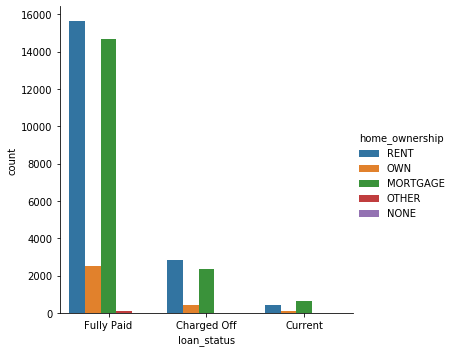

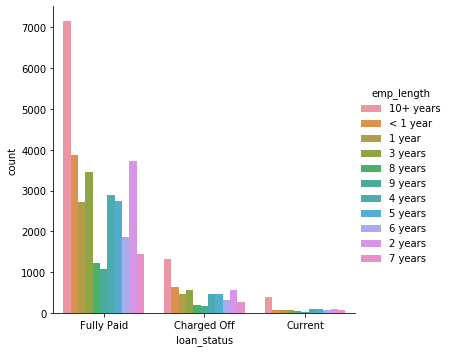

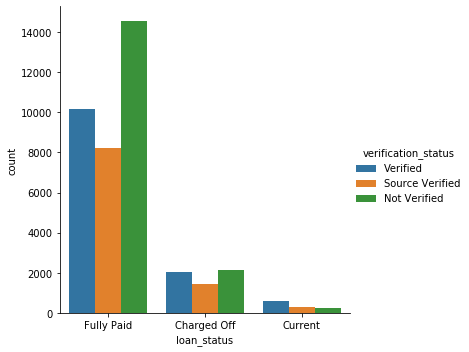

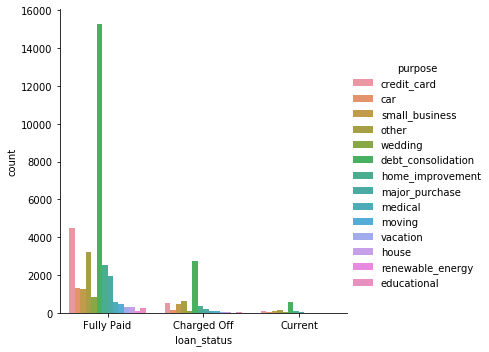

In [119]:
#first three are count plots for home_ownership, emp_length, verification_status
#fourth is according to purpose
sns.catplot(x='loan_status', hue='home_ownership', data=df, kind= 'count') # majority defectors have rents and mortgages
sns.catplot(x='loan_status', hue='emp_length', data=df, kind= 'count') # majority defectors have 10+ yrs emp
sns.catplot(x='loan_status', hue='verification_status', data=df, kind= 'count') #majority of paid and charged off are not verified
sns.catplot(x='loan_status', hue='purpose', data=df, kind= 'count')#majority defectors take loans for purpose of debt consolidation

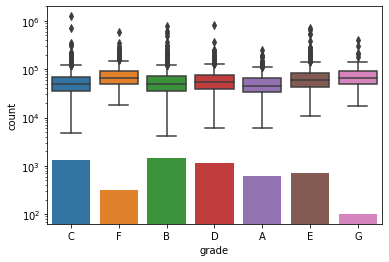

In [120]:
#plot showing the count for grades in the charged off type and their annual income
sns.boxplot(x='grade', y='annual_inc', data= df_coff)
sns.countplot(x='grade', data= df_coff)
plt.yscale('log')

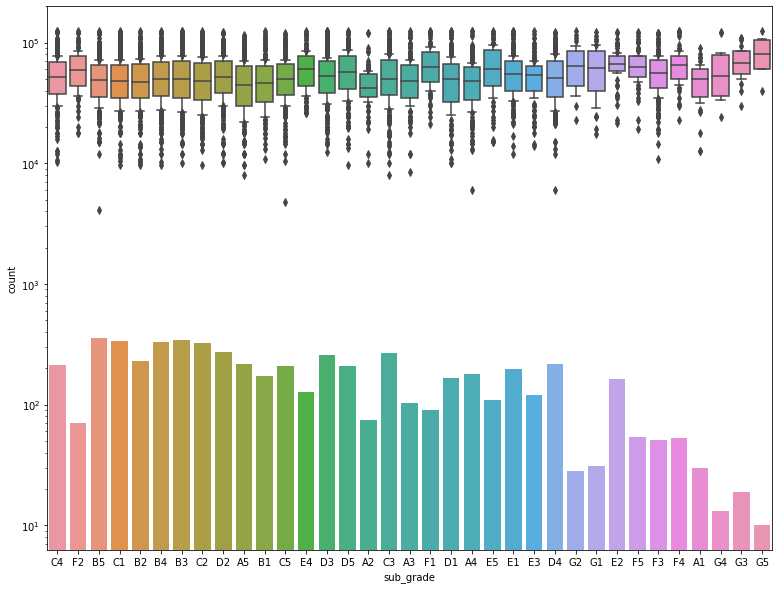

In [121]:
#subgrades in the charged off and their annual income
fig= plt.figure(figsize=(13,10))
ax1= fig.add_subplot(1,1,1)
sns.boxplot(x= 'sub_grade' ,y='annual_inc', data=df_coff.loc[df_coff.annual_inc<= 125000] , whis= 0.25, ax=ax1)
sns.countplot(x='sub_grade', data= df_coff[df_coff.loan_amnt<= 300000], ax=ax1)
plt.yscale('log')

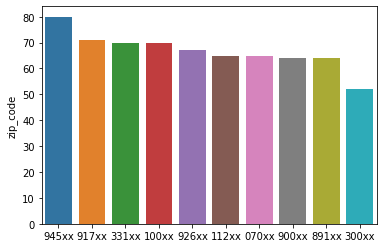

In [123]:
#count for zip code where charged off applicants reside
zip= pd.DataFrame(df_coff.zip_code.value_counts().head(10))
sns.barplot(x= zip.index, y = 'zip_code', data= zip)


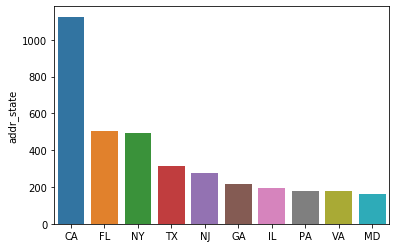

In [124]:
#state count for charged off
state= pd.DataFrame(df_coff.addr_state.value_counts().head(10))
sns.barplot(x= state.index ,y= state.addr_state , data= state)


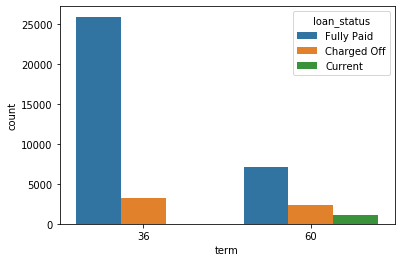

In [122]:
#countplot for term
sns.countplot(x='term', hue= 'loan_status', data= df)

In [127]:
#setting up a correlation matrix for the entire dataset
loan_correl= df.corr()

#Removing the NA columns
loan_correl= loan_correl.drop( loan_correl.loc[: , loan_correl.isnull().sum() == loan_correl.shape[0]], axis= 1)

#Removing the NA rows
loan_correl= loan_correl.drop(loan_correl.loc[loan_correl.isnull().sum(axis=1) == loan_correl.shape[1]].index, axis= 0)


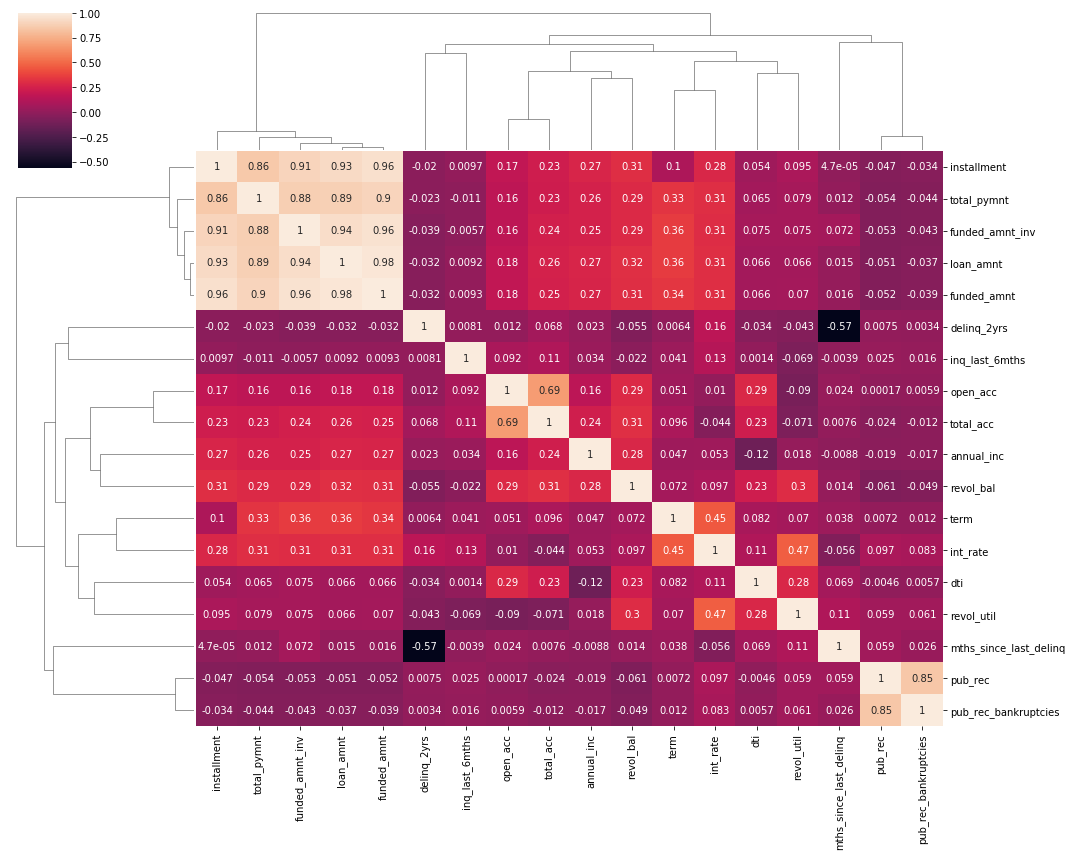

In [136]:
#Setting up a clustermap to establish correlated terms

sns.clustermap(loan_correl, annot= True, figsize= (15,12))

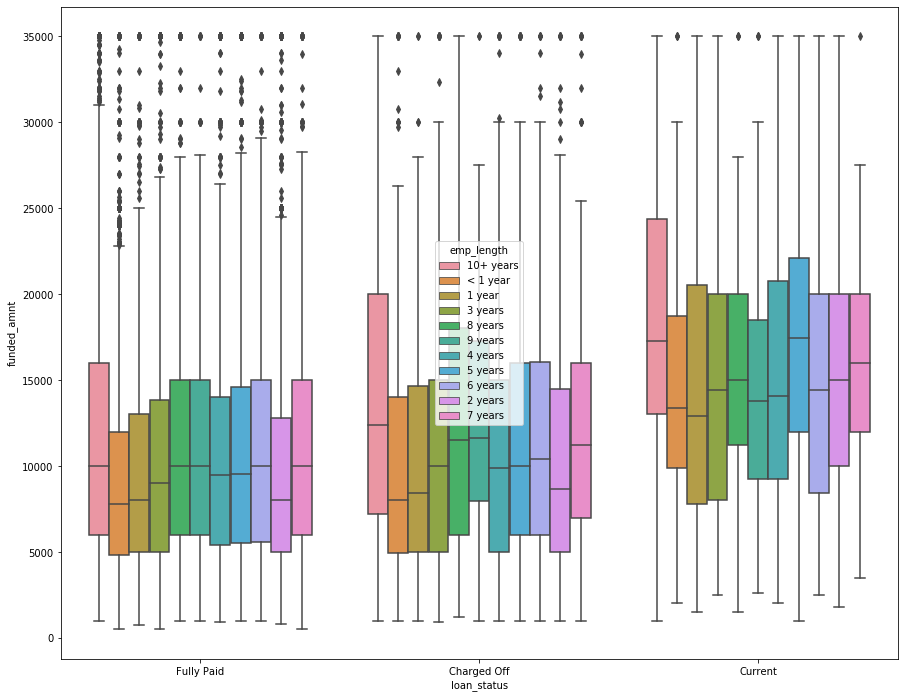

In [115]:
# funded_amount vs loan_status for emp_length taking the 99th percentile for funded_amnt

plt.figure(figsize=(15,12))
sns.boxplot(x=df['loan_status'], y= df['funded_amnt'], hue=df['emp_length'], whis= 1.5, data=df.loc[df.loan_amnt< num_out.loc['99%', 'funded_amnt']])

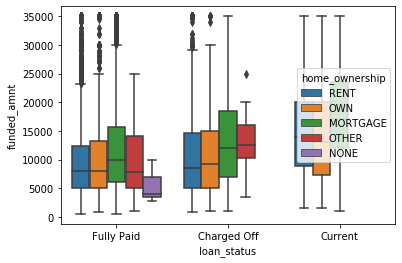

In [125]:
#loan_amnt vs loan_status for home_ownership
#Notice the charged off category for the mortage and other, the median loan is higher than that of the paid category
#plt.figure(figsize=(15,12))
sns.boxplot(x=df['loan_status'], y=df['funded_amnt'], hue=df['home_ownership'], data=df.loc[df.loan_amnt< num_out.loc['99%', 'funded_amnt']])

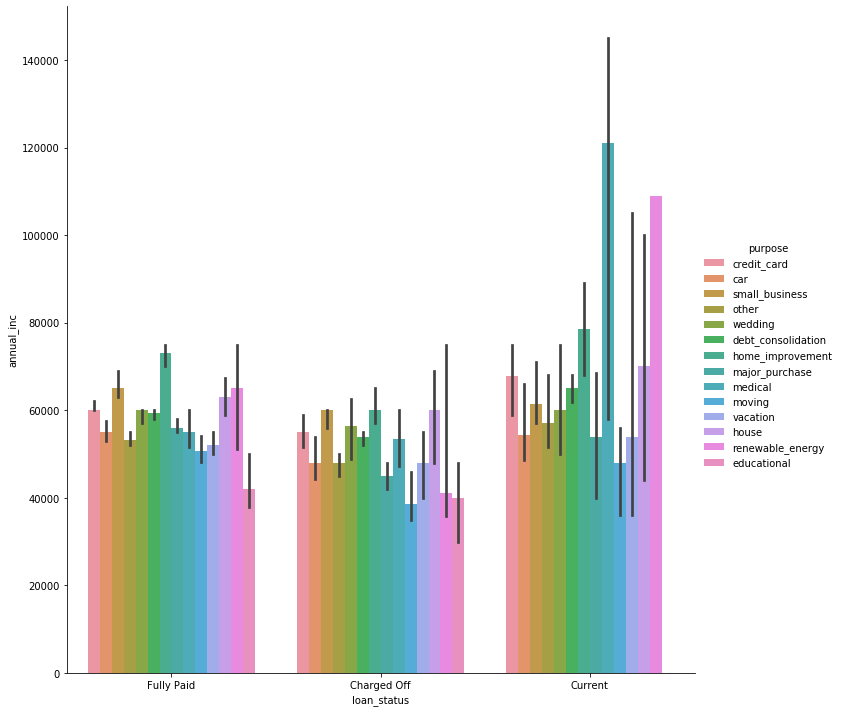

In [68]:
#This is the best pattern so far, notice the median annual income in the charged off category for each purpose
# for the medical,house,vacation type in the current category the median annual income is less than its charged off counter part
#for small businnes and car the median annual income id similar
#these could be the at risk groups since it makes a direct link between the annual income of the charged off and current categories
sns.catplot(x='loan_status', y= 'annual_inc', hue= 'purpose' , data= df.loc[df.loan_amnt< num_out.loc['99%', 'annual_inc']] , kind = 'bar', estimator= np.median, height=10, hue_order=['credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational'])

<Figure size 720x720 with 0 Axes>

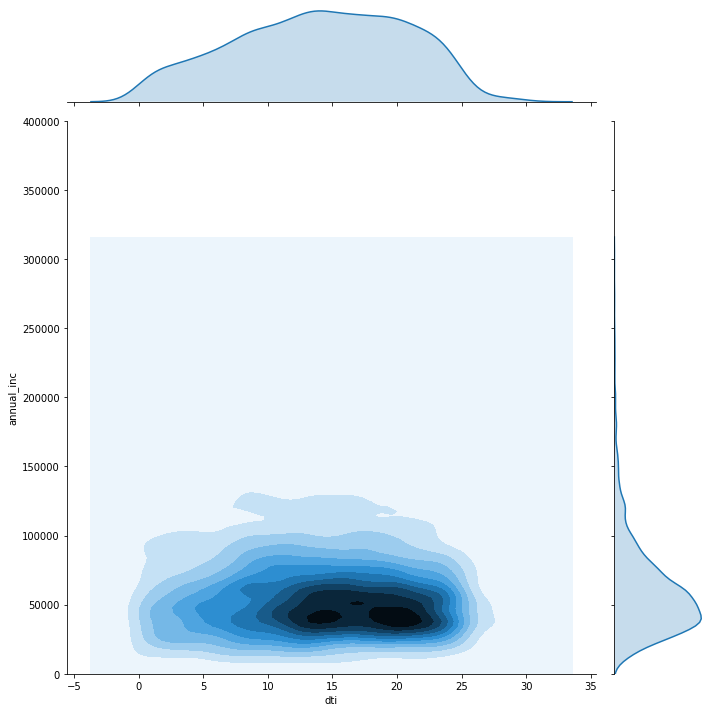

In [130]:
#plot showing dti vs annual inc for charged off
fig= plt.figure(figsize=(10,10))

data_bar= df_coff.loc[df_coff.annual_inc <= 300000, ['dti','loan_amnt', 'loan_status', 'annual_inc']].sort_values('annual_inc', ascending= True)

sns.jointplot(x='dti', y= 'annual_inc', ylim= (0,400000), data= data_bar, kind= 'kde', height= 10)


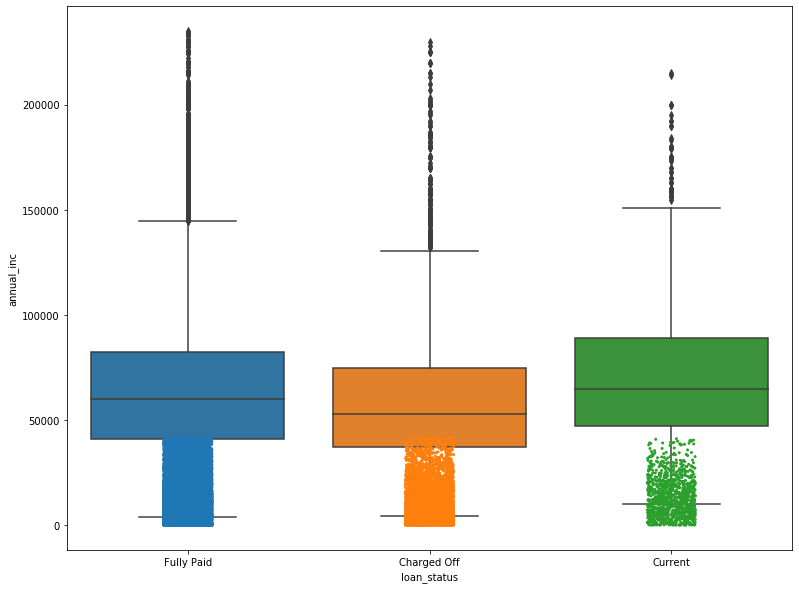

In [132]:
#plot revol bal vs ann_inc
fig= plt.figure(figsize=(13,10))
ax1= fig.add_subplot(1,1,1)
sns.stripplot(x= 'loan_status' ,y='revol_bal', data=df.loc[df.revol_bal< num_out.loc['95%', 'revol_bal']], size=3 ,ax=ax1)
sns.boxplot(x= 'loan_status', y= 'annual_inc', data= df.loc[df.annual_inc< num_out.loc['99%', 'annual_inc']], ax=ax1)
#plt.yscale('log')

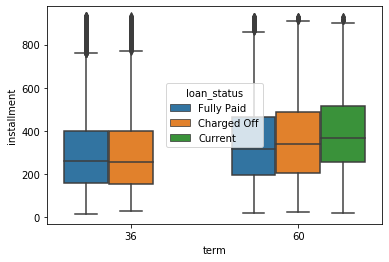

In [81]:
#installment vs term
sns.boxplot(x='term', y= 'installment', hue='loan_status', data= df.loc[df['installment'] <=num_out.loc['99%', 'installment']])



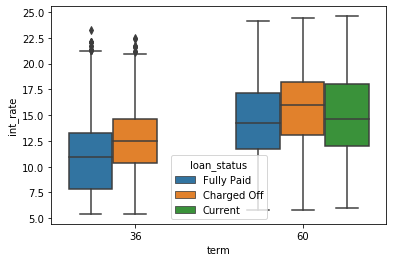

In [35]:
#intrate vs term
sns.boxplot(x='term', y= 'int_rate', hue='loan_status', data= df)